In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
print pd.__version__, np.__version__, plt.matplotlib.__version__

0.19.2 1.11.2 1.5.3


In [3]:
diamonds = pd.read_csv('diamondsbig.csv')
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,table,depth,cert,measurements,price,x,y,z
0,1,0.25,V.Good,K,I1,59.0,63.7,GIA,3.96 x 3.95 x 2.52,NaN,3.96,3.95,2.52
1,2,0.23,Good,G,I1,61.0,58.1,GIA,4.00 x 4.05 x 2.30,NaN,4.00,4.05,2.30
2,3,0.34,Good,J,I2,58.0,58.7,GIA,4.56 x 4.53 x 2.67,NaN,4.56,4.53,2.67
3,4,0.21,V.Good,D,I1,60.0,60.6,GIA,3.80 x 3.82 x 2.31,NaN,3.80,3.82,2.31
4,5,0.31,V.Good,K,I1,59.0,62.2,EGL,4.35 x 4.26 x 2.68,NaN,4.35,4.26,2.68


In [4]:
qualitative = ['cut', 'color', 'clarity', 'cert']
quantitative = ['carat', 'table', 'depth', 'price', 'x', 'y', 'z']
selected = qualitative + quantitative

In [5]:
diamonds.count()

Unnamed: 0      598024
carat           598024
cut             598024
color           598024
clarity         598024
table           598024
depth           598024
cert            598024
measurements    597978
price           597311
x               596209
y               596172
z               595480
dtype: int64

In [6]:
diamonds.dropna(inplace=True)

### Scatterplot

In [7]:
x = np.array(diamonds['carat'])
y = np.array(diamonds['price'])

[(0, 22211.0), (0, 2.06)]

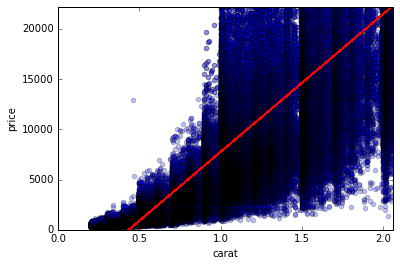

In [8]:
ax = diamonds.plot(kind='scatter', x='carat', y='price', alpha=0.25)
b, a = np.polyfit(x, y, 1)
ax.plot(x, b*x + a, color='red')
ax.set(xlim=(0, diamonds['carat'].quantile(0.9)), ylim=(0, diamonds['price'].quantile(0.9)))

### Pair plots

In [9]:
diamonds_sample = diamonds.sample(n=10000, random_state = 0)

In [10]:
%run 'ggpairs.ipynb' 

D:\Anaconda2\lib\site-packages\statsmodels\graphics\mosaicplot.py:446: RuntimeWarning: invalid value encountered in double_scalars
  x_lab = sum((x + w / 2.0) * w * h / W for (x, y, w, h) in vals)
D:\Anaconda2\lib\site-packages\statsmodels\graphics\mosaicplot.py:447: RuntimeWarning: invalid value encountered in double_scalars
  y_lab = sum((y + h / 2.0) * w * h / W for (x, y, w, h) in vals)


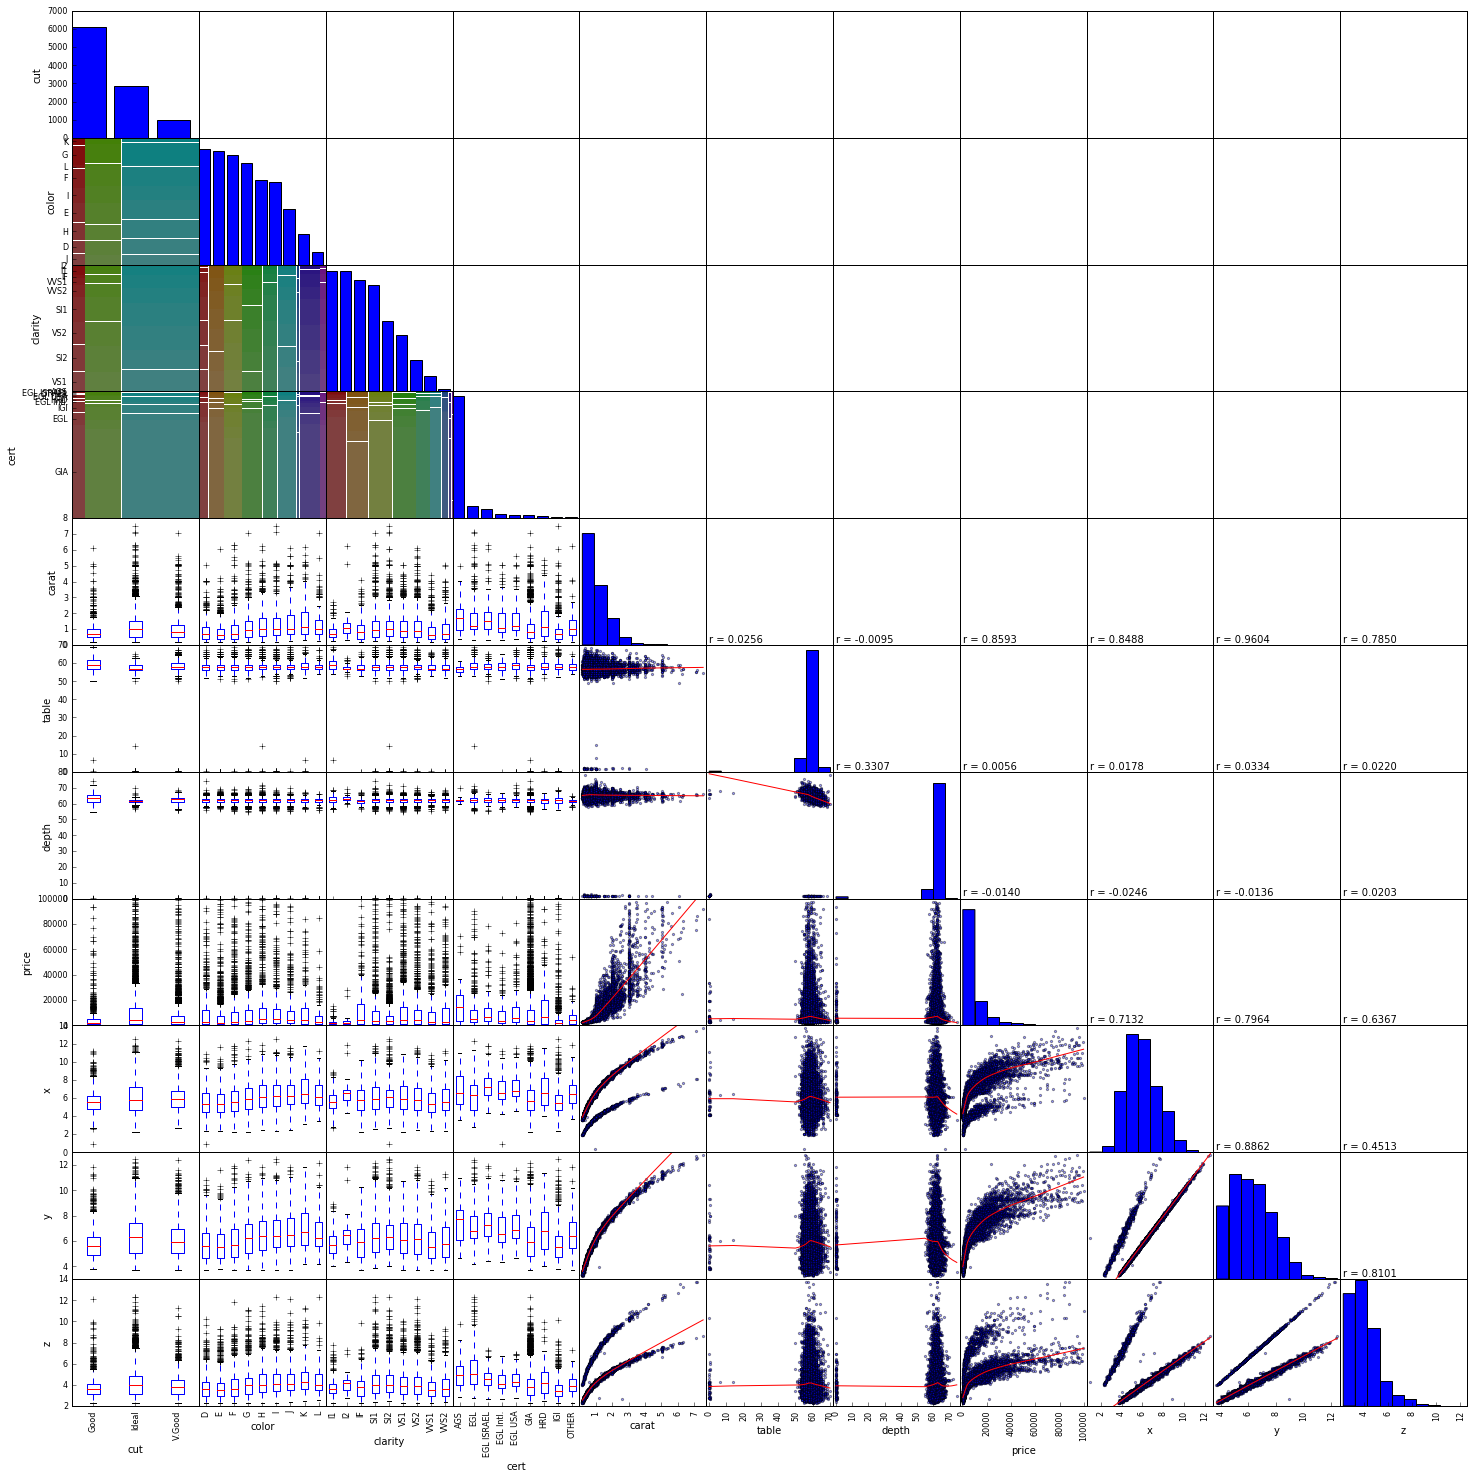

In [11]:
fig = ggpairs(diamonds_sample[selected], alpha=0.4, figsize=(25,25))

### The demand of diamonds

In [12]:
diamonds_sample['price_log10'] = np.log10(diamonds_sample['price'])

In [13]:
diamonds_sample['carat_0.33'] = np.power(diamonds_sample['carat'], 1/3.0)

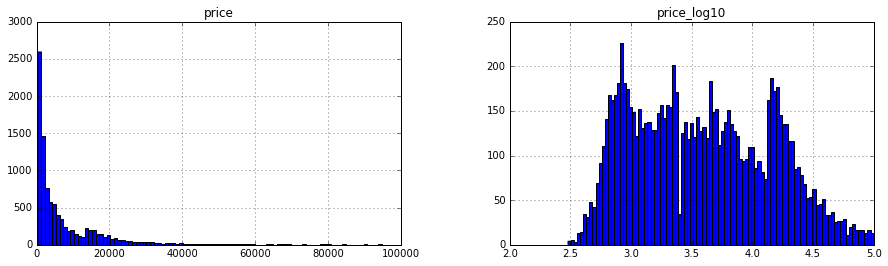

In [14]:
ax = diamonds_sample[['price', 'price_log10']].hist(bins=100, figsize=(15,4))

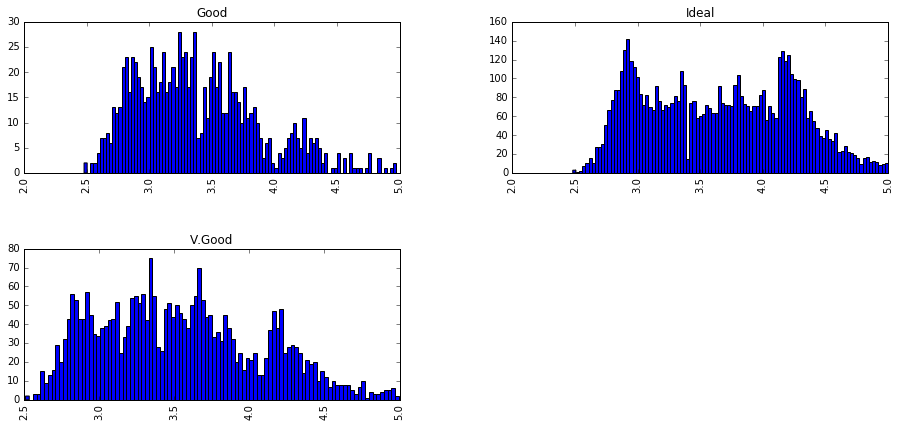

In [15]:
ax = diamonds_sample.hist('price_log10', bins=100, by='cut', figsize=(15,7))

### Scatterplot transformation and overplotting

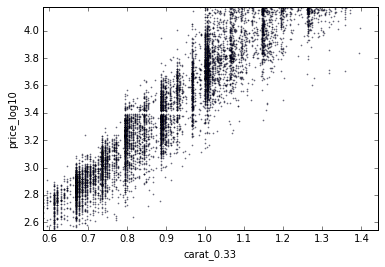

In [16]:
ax = diamonds_sample.plot('carat_0.33', 'price_log10', kind='scatter', alpha = 0.5, s=0.5)
ax = ax.set(xlim=(np.power(0.2, 1/3.0), np.power(3, 1/3.0)), ylim=(np.log10(350), np.log10(15000)))

### Clarity, Cut, Color

In [17]:
diamonds['clarity'].value_counts()

SI1     115898
VS2     110402
SI2     103671
VS1      97113
VVS2     65002
VVS1     54284
IF       30876
I1       14265
I2        2273
Name: clarity, dtype: int64

In [20]:
def carat_price_by(by='clarity'):
    import matplotlib as mpl
    import matplotlib.cm as cm
    
    categories = diamonds_sample[by].unique()
    norm = mpl.colors.Normalize(vmin=0, vmax=len(categories)-1)
    mapper = cm.ScalarMappable(norm = norm, cmap = 'gist_rainbow')  # http://matplotlib.org/examples/color/colormaps_reference.html
    colors_dict = dict(zip(categories, [mapper.to_rgba(x) for x in range(0, len(categories))]))

    for c in categories:
        index = diamonds_sample[by] == c
        plt.scatter(data = diamonds_sample[index], x='carat_0.33', y='price_log10', alpha = 0.5, label=c, c = colors_dict[c])

    plt.axes().set(title = 'Price (log10) vs Cube Rute of Carat and ' + by, xlabel='carat', ylabel='price')
    plt.axes().legend(title=by)

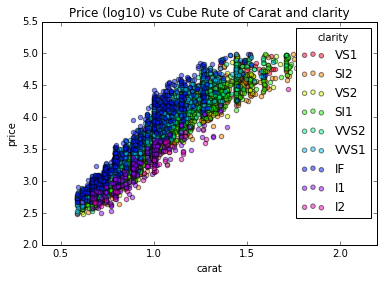

In [21]:
carat_price_by(by='clarity')

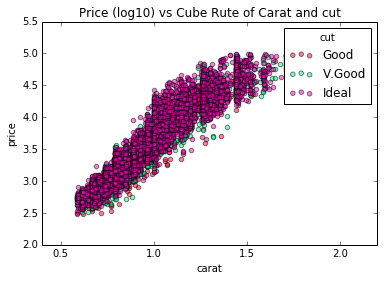

In [22]:
carat_price_by(by='cut')

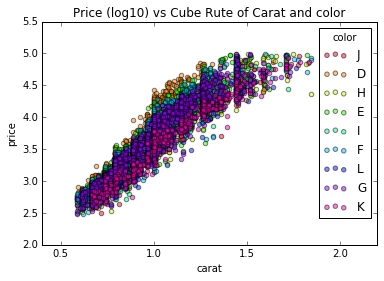

In [23]:
carat_price_by(by='color')

### Linear models with one hot

In [24]:
onehot = pd.get_dummies(diamonds_sample[['cut', 'color', 'clarity']])
onehot.head()

,cut_Good,cut_Ideal,cut_V.Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,...,color_L,clarity_I1,clarity_I2,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
374743,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
205790,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
237261,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
178039,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
436174,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [25]:
from sklearn import linear_model

def regr(list_of_numerical, list_of_categorical):
    y = diamonds_sample['price_log10']
    m = linear_model.LinearRegression()
    H = diamonds_sample[list_of_numerical]
    if list_of_categorical != []:
        H = pd.concat([H, pd.get_dummies(diamonds_sample[list_of_categorical])], axis=1)
    m.fit(H, y)
    print np.mean((m.predict(H) - y) ** 2)

list_of_numerical = ['carat_0.33']
list_of_categorical = []
regr(list_of_numerical, list_of_categorical)

list_of_numerical.append('carat')
regr(list_of_numerical, list_of_categorical)

list_of_categorical = ['cut']
regr(list_of_numerical, list_of_categorical)

list_of_categorical.append('color')
regr(list_of_numerical, list_of_categorical)

list_of_categorical.append('clarity')
regr(list_of_numerical, list_of_categorical)

0.0339473793858
0.0286215153307
0.0271100349305
0.0191060976307
0.0102026997968
